# Recent Graduates Project Overview
**In this project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.**

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots


## Summary of Results

# Environment Setup

## Loading Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import git
import re

from pathlib import Path

In [2]:
# Jupyter magic to display plots inline
%matplotlib inline

## Importing our Recent Graduate Data
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Now that we have an overview of the data we'll be viewing, let's read in the dataset and see what it looks like!

In [3]:
# Read in the data
repo_root = Path(git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel"))
file_name = 'recent-grads.csv'
file_path = f'{repo_root}/data/{file_name}'
recent_grads = pd.read_csv(file_path, delimiter=',')

# Quick exploration of the data
display(recent_grads.shape)
display(recent_grads.columns)
display(recent_grads.info())
display(recent_grads.isnull().sum())
display(recent_grads.head())
display(recent_grads.tail())
display(recent_grads.describe())

(173, 21)

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

None

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


# Data Cleaning & Imputation
As we can see from the above, there are a few data points that need cleaned up and imputated. Let's get started with addressing that.

## Column Headers
The column names are camel case and they fail to adhere to the general syntax (one_two > oneTwo). Hence, us needing to clean that up.

In [4]:
# Function to help us easily clean up our columns
def clean_col_headers(col):
    # Adding a '_' between camel case col and lowercasing it
    return re.sub(r"(\w)([A-Z])", r"\1_\2", col).lower()

In [5]:
# Creating a copy of our dataframe
recent_grads_use = recent_grads.copy()

# Cleaning up our columns
recent_grads_use.columns = [clean_col_headers(col) for col in recent_grads_use.columns]

# Viewing our cleaned up columns
recent_grads_use.columns

Index(['rank', 'major_code', 'major', 'total', 'men', 'women',
       'major_category', 'share_women', 'sample_size', 'employed', 'full_time',
       'part_time', 'full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th', 'college_jobs', 'non_college_jobs',
       'low_wage_jobs'],
      dtype='object')

## Null Values
There aren't many, but in order to visualize our data without any challenges, let's go ahead and drop any null values

In [6]:
# Taking a peak at these columns
recent_grads_use = recent_grads_use.dropna()
recent_grads_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
rank                    172 non-null int64
major_code              172 non-null int64
major                   172 non-null object
total                   172 non-null float64
men                     172 non-null float64
women                   172 non-null float64
major_category          172 non-null object
share_women             172 non-null float64
sample_size             172 non-null int64
employed                172 non-null int64
full_time               172 non-null int64
part_time               172 non-null int64
full_time_year_round    172 non-null int64
unemployed              172 non-null int64
unemployment_rate       172 non-null float64
median                  172 non-null int64
p25th                   172 non-null int64
p75th                   172 non-null int64
college_jobs            172 non-null int64
non_college_jobs        172 non-null int64
low_wage_jobs          

# Exploratory Visualization
Using visualization, let's start exploring our datasets to see if we can find any correlations

## Scatter Plots

In [7]:
def scatter_data(df, x, y, title, x_label, y_label):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(df[x], df[y], s=[50*n for n in range(len(x))], edgecolors='b')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_title(title, fontsize=18)

### `unemployment_rate` vs `median`

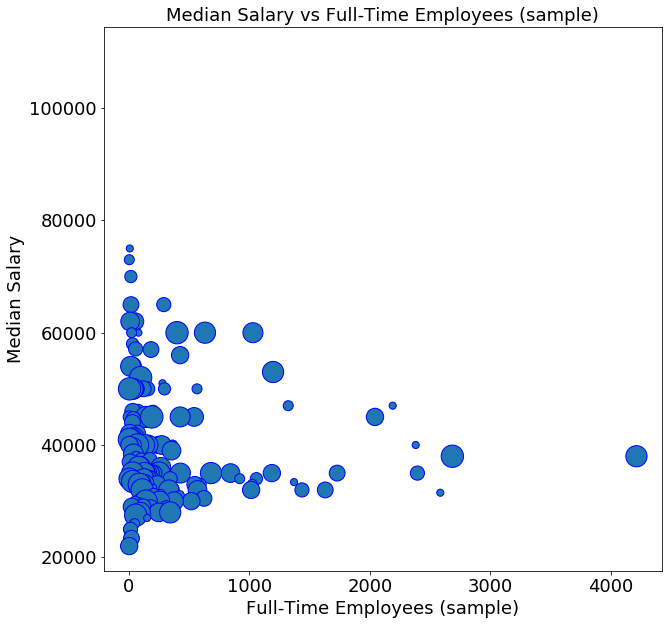

In [8]:
x = 'sample_size'
y = 'median'
title = 'Median Salary vs Full-Time Employees (sample)'
x_label = 'Full-Time Employees (sample)'
y_label = 'Median Salary'

scatter_data(recent_grads_use, x=x, y=y, title=title, x_label=x_label, y_label=y_label)

### `unemployment_rate` vs `sample_size` 

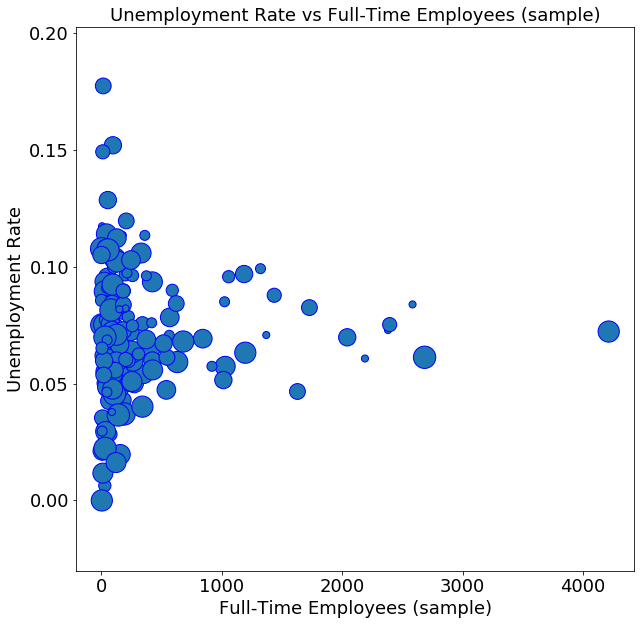

In [9]:
x = 'sample_size'
y = 'unemployment_rate'
title = 'Unemployment Rate vs Full-Time Employees (sample)'
x_label = 'Full-Time Employees (sample)'
y_label = 'Unemployment Rate'

scatter_data(recent_grads_use, x=x, y=y, title=title, x_label=x_label, y_label=y_label)

### `median` vs `full_time`

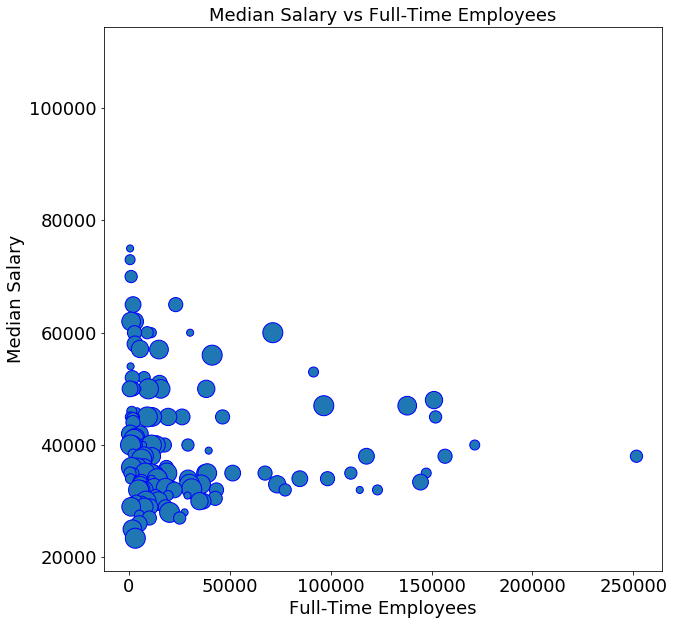

In [10]:
x = 'full_time'
y = 'median'
title = 'Median Salary vs Full-Time Employees'
x_label = 'Full-Time Employees'
y_label = 'Median Salary'

scatter_data(recent_grads_use, x=x, y=y, title=title, x_label=x_label, y_label=y_label)

### `unemployment_rate` vs `share_woman`

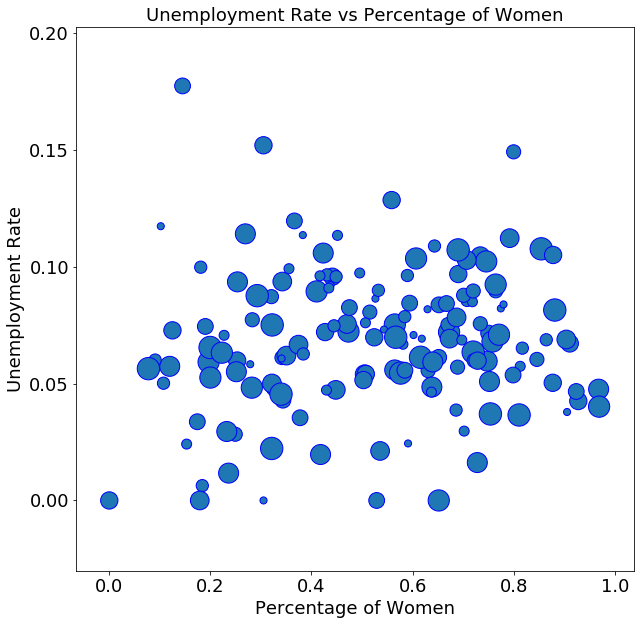

In [11]:
x = 'share_women'
y = 'unemployment_rate'
title = 'Unemployment Rate vs Percentage of Women'
x_label = 'Percentage of Women'
y_label = 'Unemployment Rate'

scatter_data(recent_grads_use, x=x, y=y, title=title, x_label=x_label, y_label=y_label)

### `median` vs `woman`

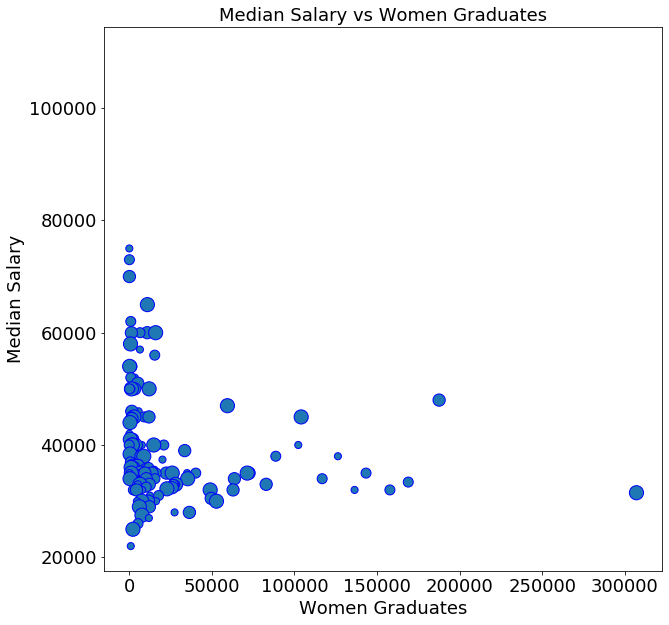

In [12]:
x = 'women'
y = 'median'
title = 'Median Salary vs Women Graduates'
x_label = 'Women Graduates'
y_label = 'Median Salary'

scatter_data(recent_grads_use, x=x, y=y, title=title, x_label=x_label, y_label=y_label)

## Histograms

In [13]:
def histogram_data(df, x, title, x_label, y_label='Frequency', bins=20):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.hist(df[x], bins=bins, edgecolor='black', linewidth=1.2)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.set_title(title, fontsize=18)

### `sample_size`

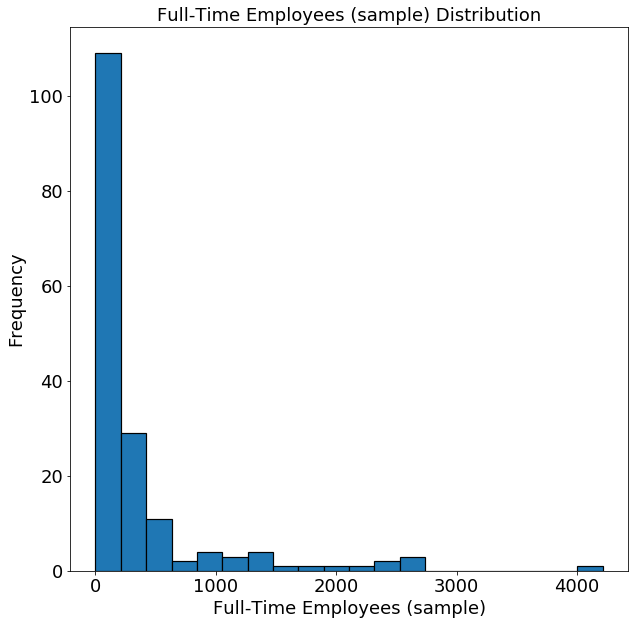

In [14]:
x = 'sample_size'
x_label = 'Full-Time Employees (sample)'
title = 'Full-Time Employees (sample) Distribution'

histogram_data(recent_grads_use, x, title, x_label)

### `median`

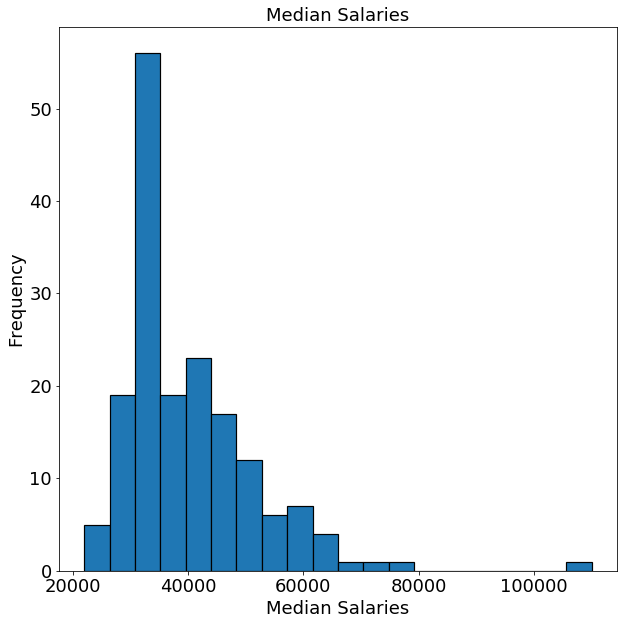

In [15]:
x = 'median'
x_label = 'Median Salaries'
title = 'Median Salaries'

histogram_data(recent_grads_use, x, title, x_label)

### `employed`

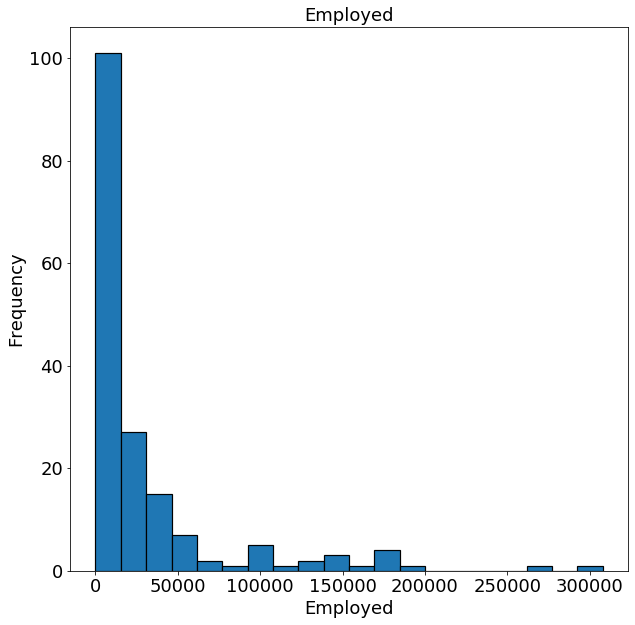

In [16]:
x = 'employed'
x_label = 'Employed'
title = 'Employed'

histogram_data(recent_grads_use, x, title, x_label)

## Scatter Matrix

In [17]:
from pandas.plotting import scatter_matrix

def scatter_2x2_matx(df, cols_use):
    scatter_matrix()

### `sample_size` vs `median`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1089a9978>,
      dtype=object)

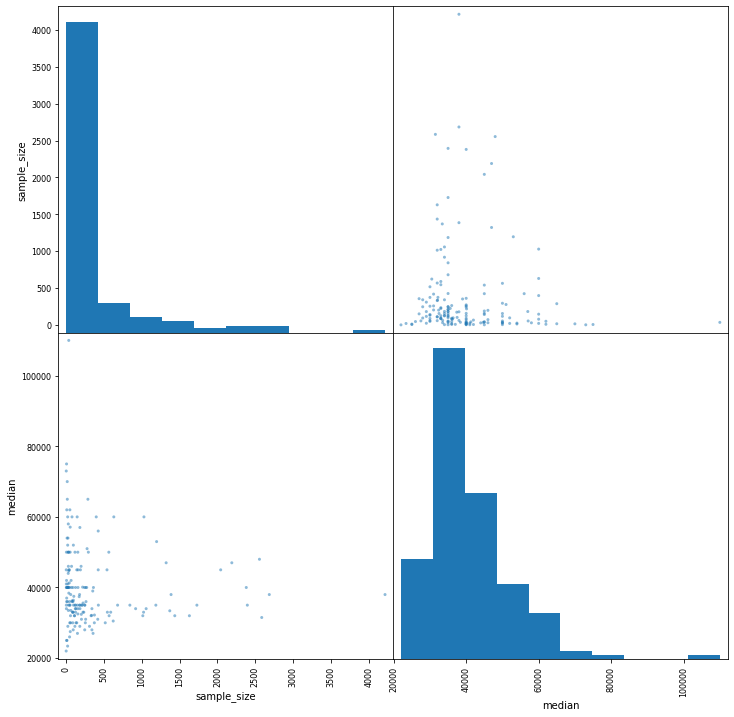

In [18]:
scatter_matrix(recent_grads_use[['sample_size', 'median']], figsize=(12,12))

### `sample_size` vs `median` vs `unemployment_rate`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1096965c0>,
      dtype=object)

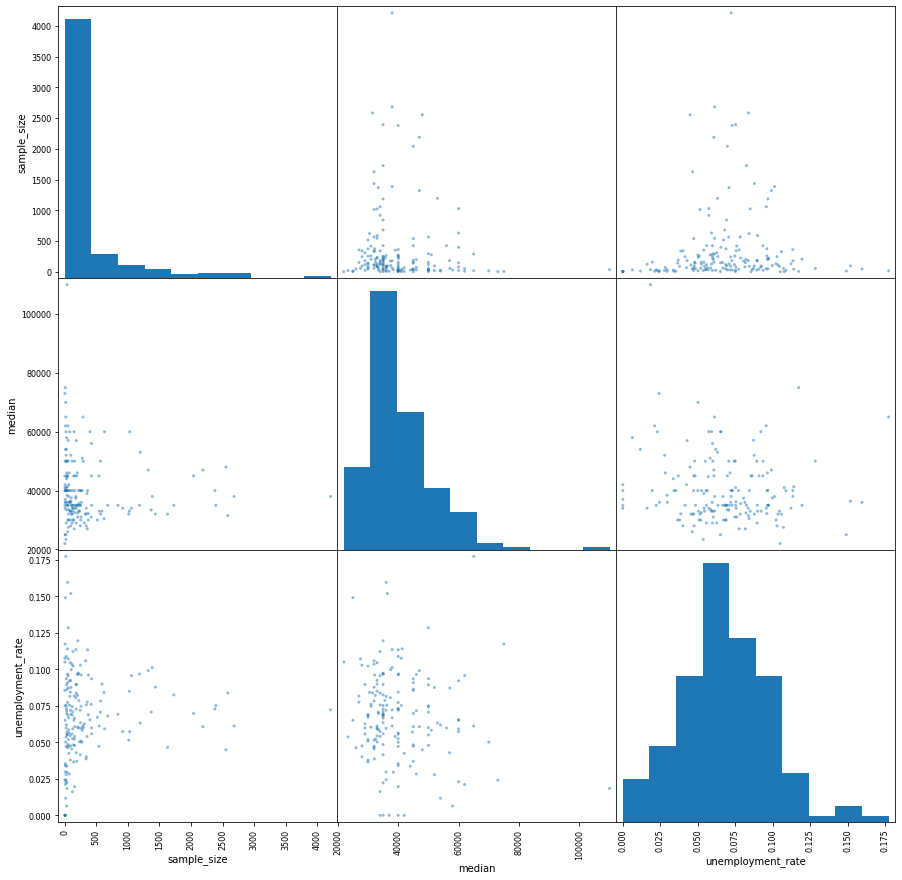

In [19]:
scatter_matrix(recent_grads_use[['sample_size', 'median', 'unemployment_rate']], figsize=(15,15))

## Bar Charts

### `share_women`

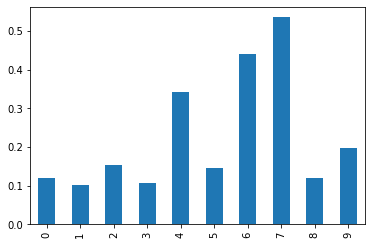

In [20]:
recent_grads_use[:10]['share_women'].plot(kind='bar')

### `unemployment_rate`

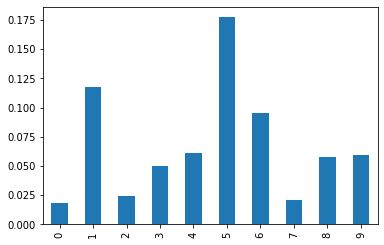

In [21]:
recent_grads_use[:10]['unemployment_rate'].plot(kind='bar')

# Future Consideration
In this project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on plotting in pandas, you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.